In [22]:
#import necessray modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [23]:
#open the dataset
dataset=pd.read_csv("twitchdata-update.csv")
print(dataset.head())

    Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
0     xQcOW           6196161750                215250        222720   
1  summit1g           6091677300                211845        310998   
2    Gaules           5644590915                515280        387315   
3  ESL_CSGO           3970318140                517740        300575   
4      Tfue           3671000070                123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     

In [24]:
#data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [25]:
print(dataset.shape)
print("This Twitch stream dataset(2020) has {} rows and {} columns.".format(dataset.shape[0], dataset.shape[1]))

(1000, 11)
This Twitch stream dataset(2020) has 1000 rows and 11 columns.


In [26]:
print(dataset.isnull().sum())

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64


No null values in this dataset, as we can see from the info table.

In [27]:
#Data analysis 
dataset_sortL=dataset.groupby("Language")
L=dataset_sortL.count().sort_values(by="Channel", ascending=False)
L_top10=L.nlargest(10, "Channel")
print(L_top10)

            Channel  Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
Language                                                                       
English         485                  485                   485           485   
Korean           77                   77                    77            77   
Russian          74                   74                    74            74   
Spanish          68                   68                    68            68   
French           66                   66                    66            66   
Portuguese       61                   61                    61            61   
German           49                   49                    49            49   
Chinese          30                   30                    30            30   
Turkish          22                   22                    22            22   
Italian          17                   17                    17            17   

            Average viewers  Followers 

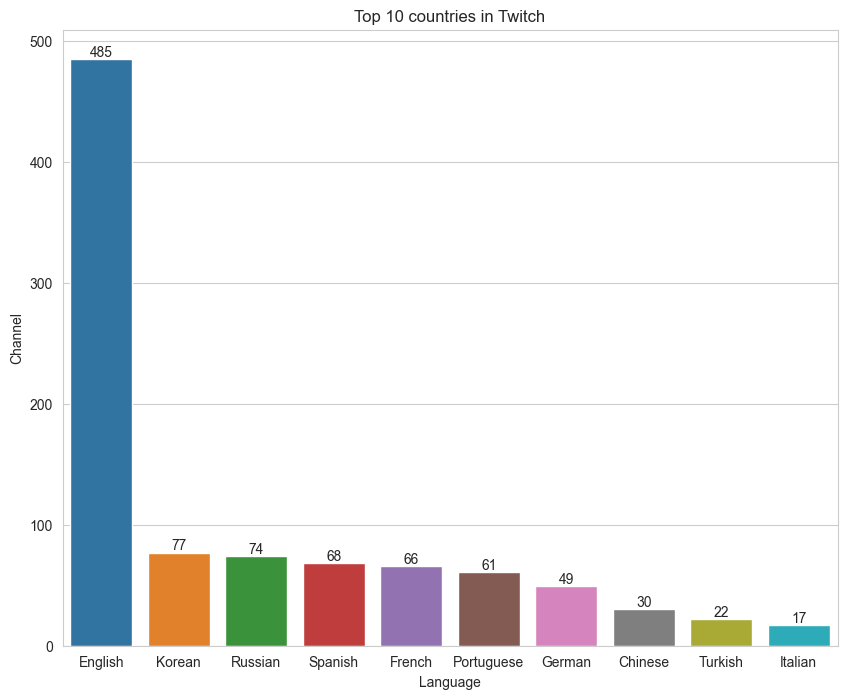

In [28]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=L_top10.index, y="Channel", data=L_top10)
ax.bar_label(ax.containers[0])

plt.title("Top 10 countries in Twitch")
plt.show()

From this graph, we could easily see that the main contents in Twitch are basically provided in English.

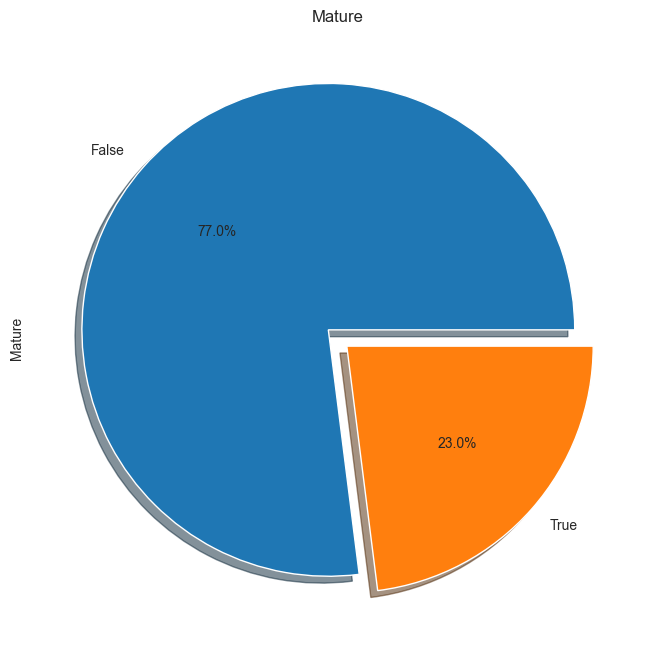

In [29]:
tf=dataset.Mature.value_counts()
tf.plot.pie(figsize=(8,8),autopct='%1.1f%%', shadow=True, explode=(0.05, 0.05))
plt.title("Mature")

plt.show()

Over 75% of streamers in Twitch are not mature.

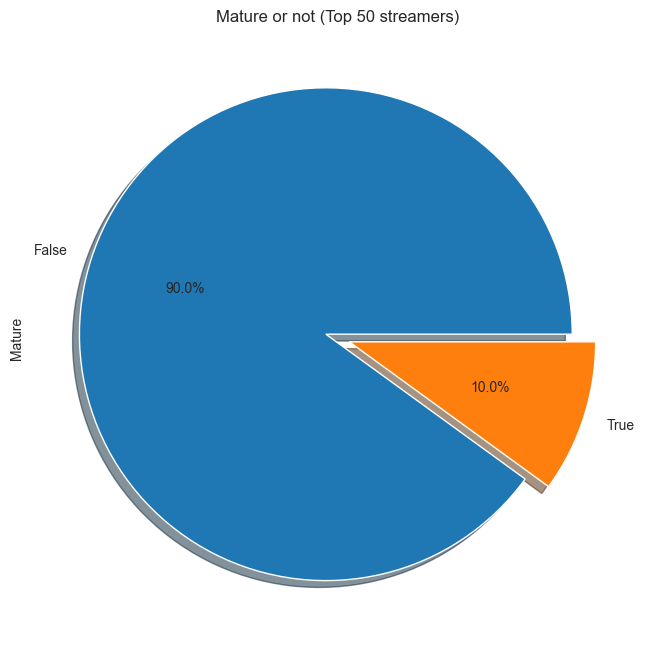

In [30]:
Followers_count=dataset.sort_values(by="Followers", ascending=False).head(50)
F=Followers_count.Mature.value_counts()
F.plot.pie(figsize=(8,8),autopct='%1.1f%%', shadow=True, explode=(0.05, 0.05))

plt.title("Mature or not (Top 50 streamers)")
plt.show()

In top 50 streamers, only 10% of streamers are mature! It is apparent that Twitch is basically teenager-dominated.

In [31]:
dataset_1=dataset[["Watch time(Minutes)",  "Stream time(minutes)",  "Peak viewers", "Average viewers",  "Followers",  "Followers gained",  "Views gained"]]

dataset_1_c=dataset_1.corr()

print(dataset_1_c)

                      Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
Watch time(Minutes)              1.000000              0.150588      0.582797   
Stream time(minutes)             0.150588              1.000000     -0.119540   
Peak viewers                     0.582797             -0.119540      1.000000   
Average viewers                  0.476165             -0.249248      0.682637   
Followers                        0.620234             -0.091299      0.532529   
Followers gained                 0.514648             -0.158165      0.470415   
Views gained                     0.529862              0.064370      0.298063   

                      Average viewers  Followers  Followers gained  \
Watch time(Minutes)          0.476165   0.620234          0.514648   
Stream time(minutes)        -0.249248  -0.091299         -0.158165   
Peak viewers                 0.682637   0.532529          0.470415   
Average viewers              1.000000   0.428303          0.420097   
F

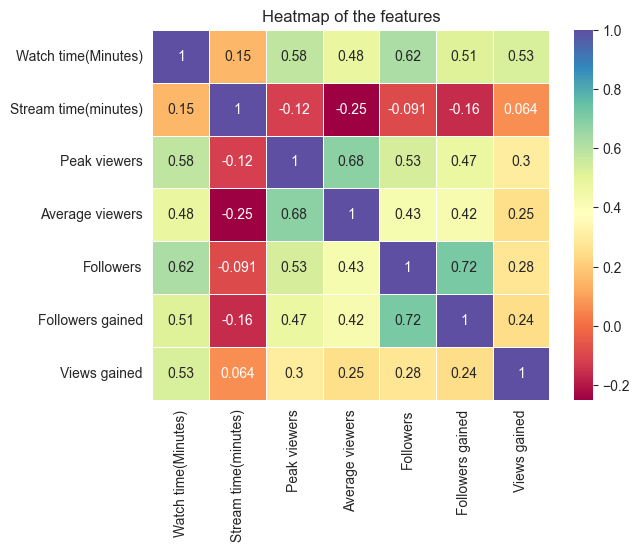

In [32]:
sns.heatmap(dataset_1_c, cmap="Spectral", annot=True, linewidths=.5)

plt.title("Heatmap of the features")
plt.show()

From this heatmap graph we could see some interesing things. First of all, the corresponding parameters between stream time and average viewers are bad. Let's check it.

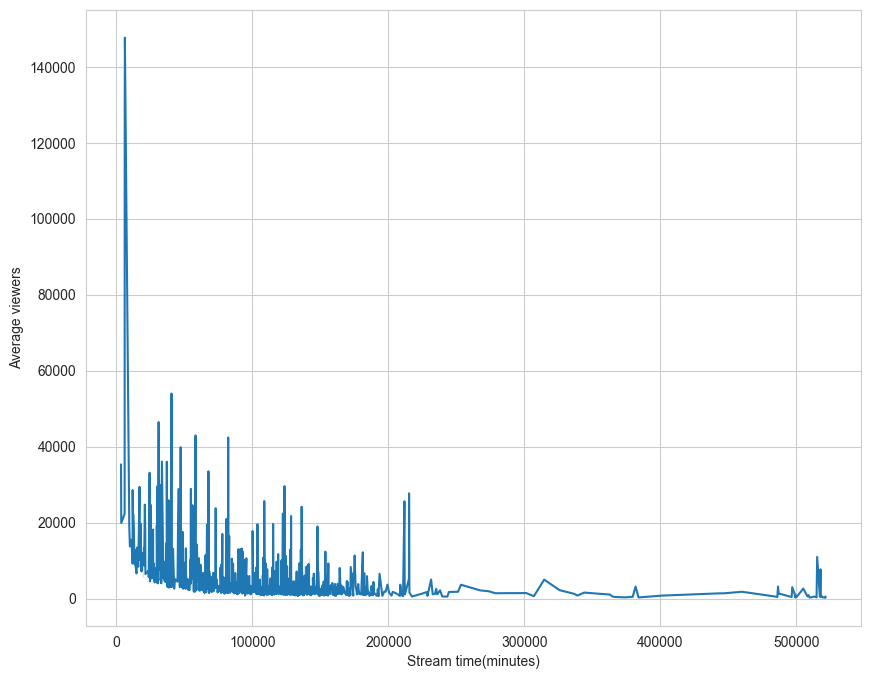

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.lineplot(x="Stream time(minutes)", y="Average viewers", data=dataset)


plt.show()

This graph illustrate that when streamers have stream time more than 200000 minutes(that is, more than around 138 days) will be inefficient, almost no people want to see the stream if the stream frequency is such high.

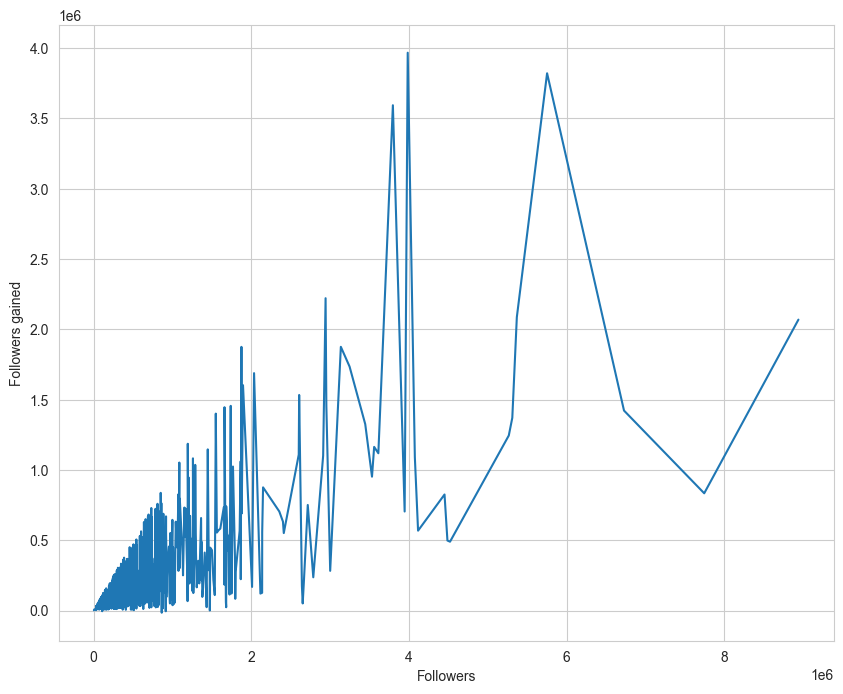

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.lineplot(x="Followers", y="Followers gained", data=dataset)


plt.show()

This graph illustrate an interstimg fact that streamers having more followers attracts more people to follow them. 

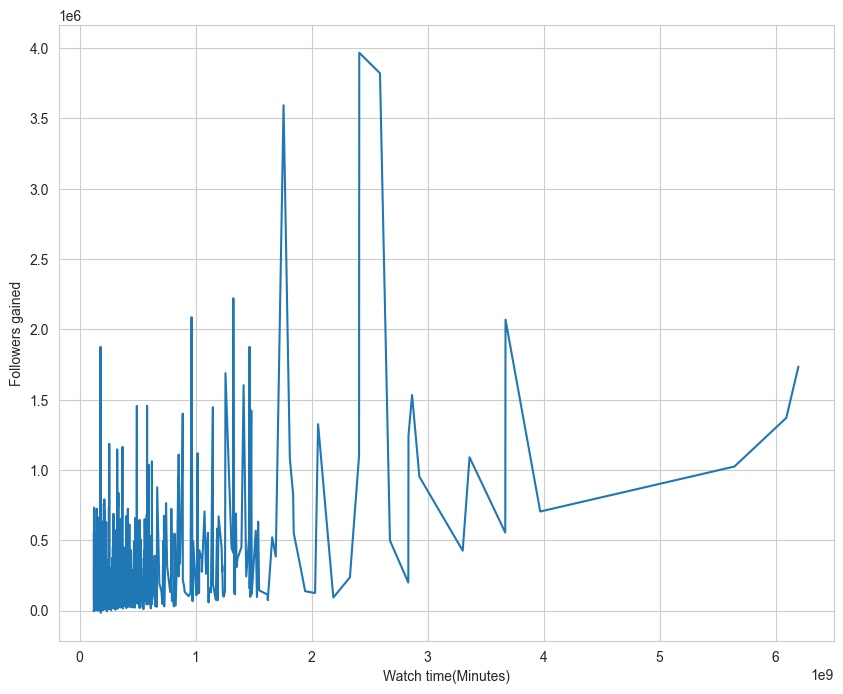

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.lineplot(x="Watch time(Minutes)", y="Followers gained", data=dataset)


plt.show()

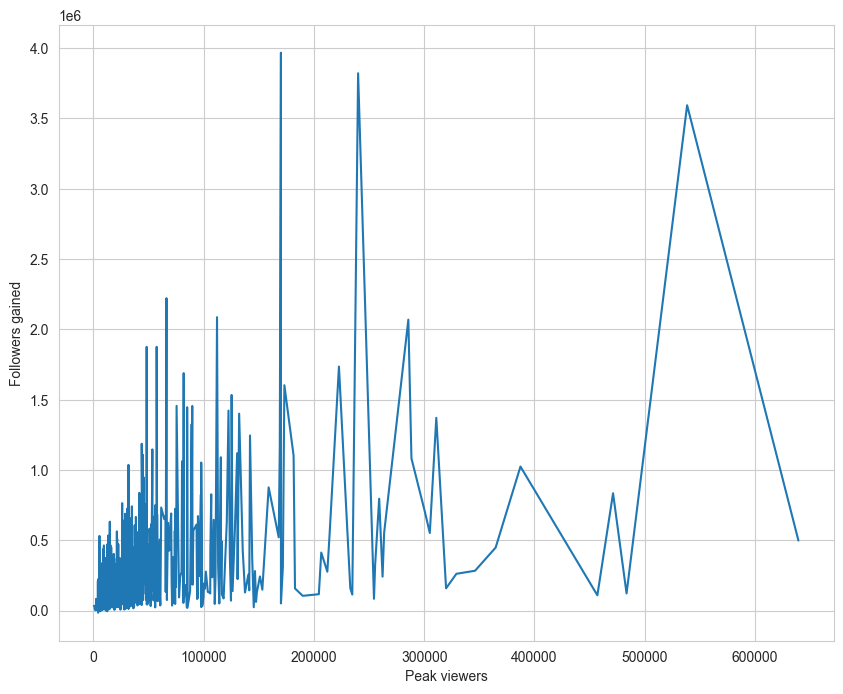

In [36]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
sns.lineplot(x="Peak viewers", y="Followers gained", data=dataset)


plt.show()

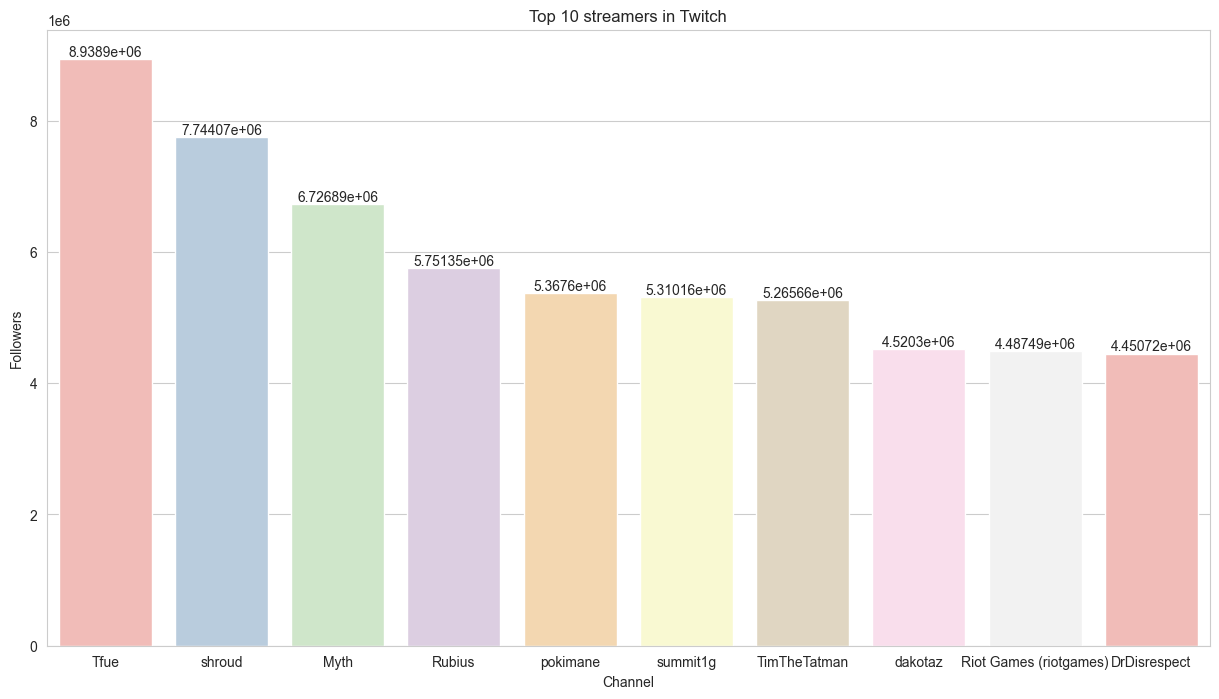

In [44]:
plt.figure(figsize=(15, 8))

Most_followers=dataset.sort_values(by="Followers", ascending=False).head(10)
MF=sns.barplot(x="Channel", y="Followers", data=Most_followers, palette="Pastel1")
MF.bar_label(MF.containers[0])

plt.title("Top 10 streamers in Twitch")
plt.show()